In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
df_train= pd.read_excel("C:\\Users\\User\\Downloads\\Flight_Price_Train.xlsx")
df_test= pd.read_excel("C:\\Users\\User\\Downloads\\Flight_Price_Test.xlsx")

In [153]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [154]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [66]:
df_train['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [67]:
df_test['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

# 1) Perform Feature Engineering

# a) Perform basic exploration like checking for top 5 records, 
shape, statistical info, duplicates, Null values etc. 

In [68]:
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [69]:
df_train.shape

(10683, 11)

In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [71]:
df_train.describe(include='object')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [72]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [73]:
df_train.duplicated().sum()

220

In [74]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [75]:
df_train[df_train.duplicated(subset=['Airline', 'Date_of_Journey', 'Source', 
                                                       'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 
                                                       'Duration', 'Total_Stops', 'Additional_Info'], keep=False)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
33,Jet Airways,15/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,12:35 16 Jun,22h,2 stops,In-flight meal not included,10919
44,Multiple carriers,21/03/2019,Delhi,Cochin,DEL → BOM → COK,09:00,21:00,12h,1 stop,No info,13062
45,SpiceJet,24/03/2019,Banglore,New Delhi,BLR → DEL,05:45,08:35,2h 50m,non-stop,No check-in baggage included,3527
49,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150
...,...,...,...,...,...,...,...,...,...,...,...
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10643,Multiple carriers,18/05/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:30 19 May,6h 30m,1 stop,No info,7670
10662,Air India,24/03/2019,Kolkata,Banglore,CCU → BOM → GOI → BLR,09:25,05:35 25 Mar,20h 10m,2 stops,No info,12352
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


# b) Extract Date, Month, Year from Date of Journey column

In [76]:
df_train['Date'] = pd.to_datetime(df_train.Date_of_Journey).dt.day
df_train['Month'] = pd.to_datetime(df_train.Date_of_Journey).dt.month
df_train['Year'] = pd.to_datetime(df_train.Date_of_Journey).dt.year

C:\Users\User\AppData\Local\Temp\ipykernel_4008\2857722257.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_train['Date'] = pd.to_datetime(df_train.Date_of_Journey).dt.day
C:\Users\User\AppData\Local\Temp\ipykernel_4008\2857722257.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_train['Month'] = pd.to_datetime(df_train.Date_of_Journey).dt.month
C:\Users\User\AppData\Local\Temp\ipykernel_4008\2857722257.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_train['Year'] = pd.to_datetime(df_train.Date_of_Journey).dt.year


In [77]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


# 2) Perform Exploratory Data Analysis (EDA) tasks

# a) Which airline is most preferred airline

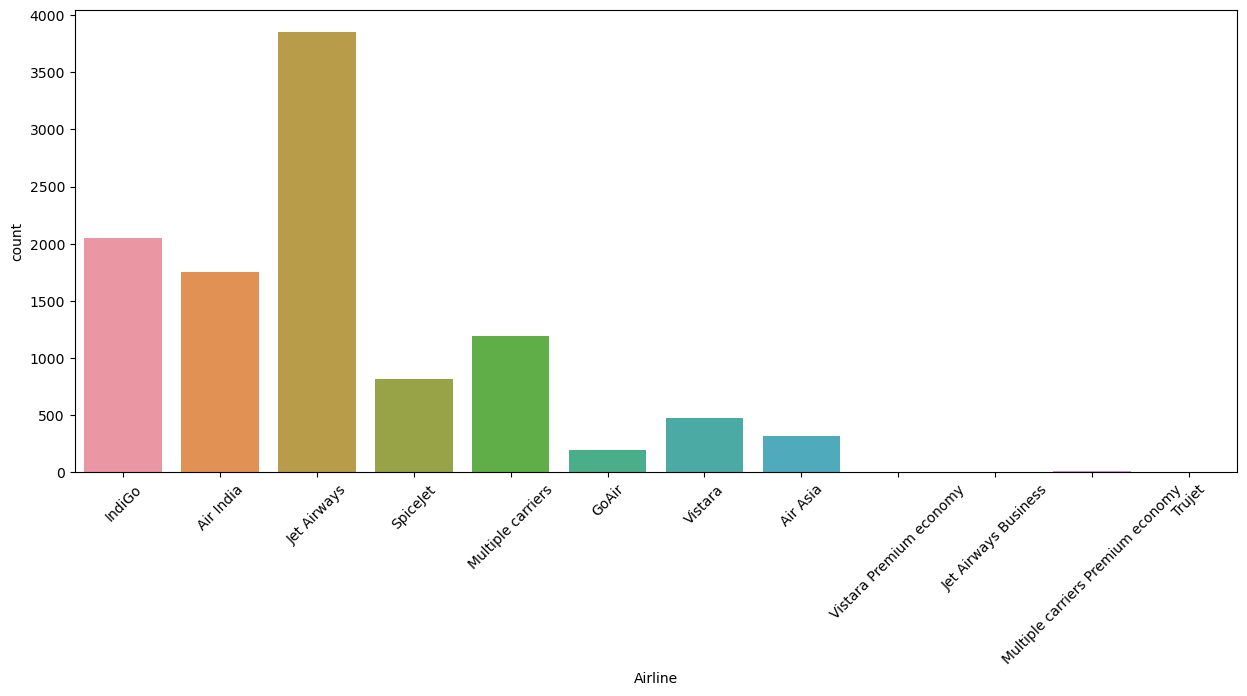

In [78]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_train, x='Airline')
plt.xticks(rotation=45)
plt.show()

In [79]:
df_train.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

# c) Find the majority of the flights take off from which source

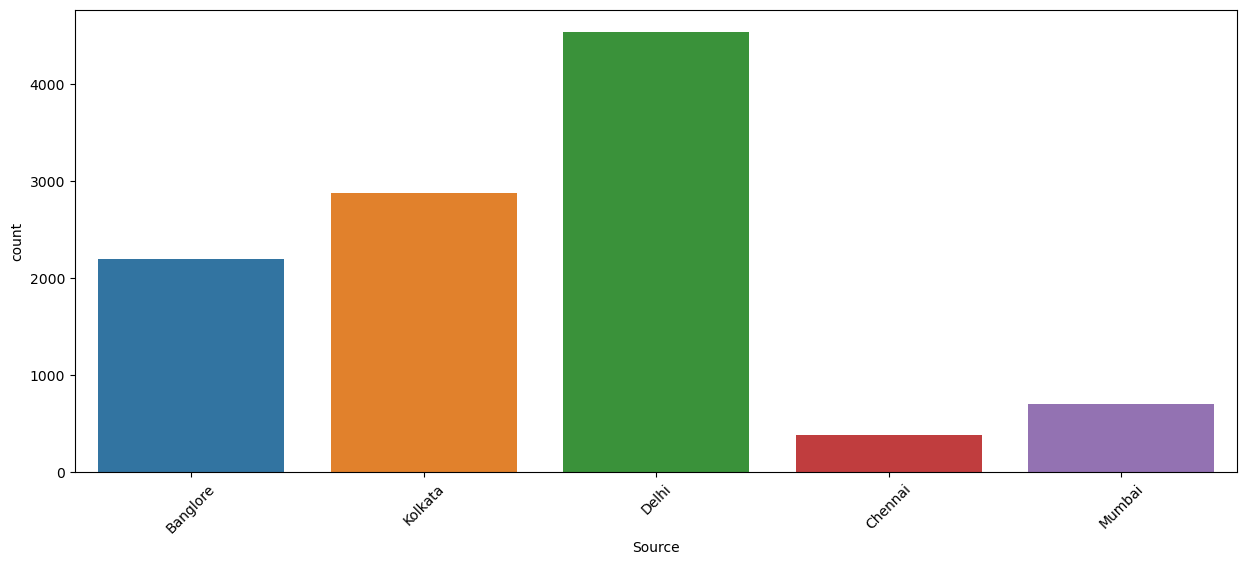

In [80]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_train, x='Source')
plt.xticks(rotation=45)
plt.show()

In [81]:
df_train.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

# d) Find maximum flights land in which destination

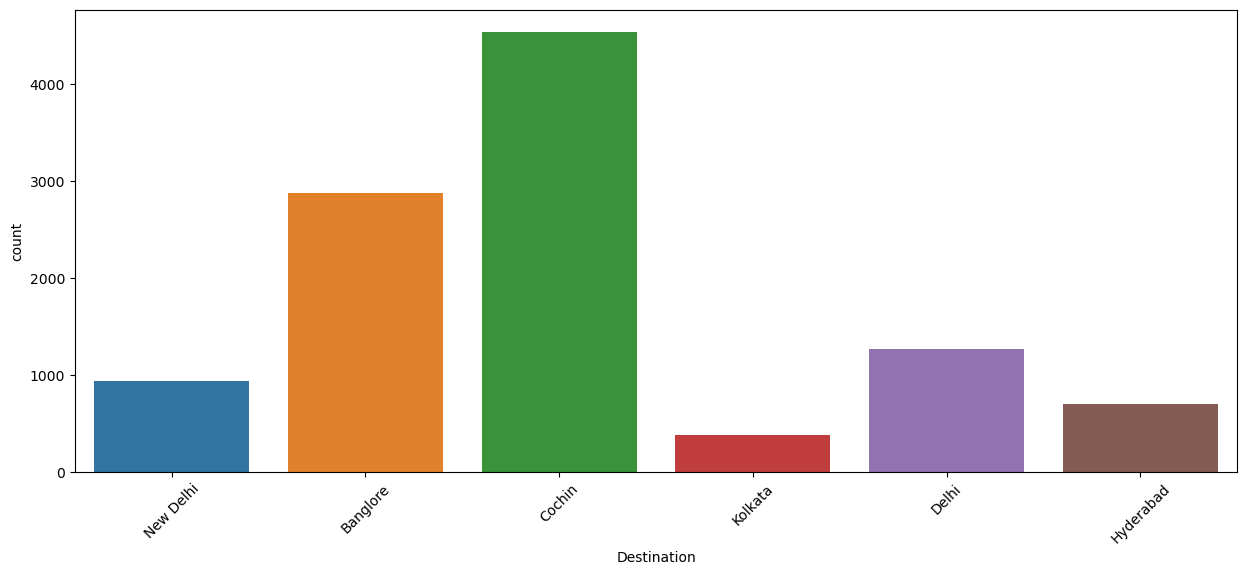

In [82]:
plt.figure(figsize=(15,6))
sns.countplot(data=df_train, x='Destination')
plt.xticks(rotation=45)
plt.show()

In [83]:
df_train.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

# 3) Compare independent features with Target feature to check the 
impact on price

# a) Which airline has the highest price

In [84]:
df_train.groupby(by='Airline')['Price'].max().sort_values(ascending=False)

Airline
Jet Airways Business                 79512
Jet Airways                          54826
Multiple carriers                    36983
Air India                            31945
SpiceJet                             23267
GoAir                                22794
IndiGo                               22153
Vistara                              21730
Multiple carriers Premium economy    14629
Air Asia                             13774
Vistara Premium economy              11793
Trujet                                4140
Name: Price, dtype: int64

# b) Check if the business class flights are high price or low and find 
only those flights which price is higher than 50k

In [85]:
df_train.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [86]:
df_train.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [87]:
above_50k_flights = df_train[(df_train.Price>50000)]
above_50k_flights 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229,1,3,2019
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,2019
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,2019
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512,1,3,2019
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427,1,3,2019
5439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826,1,3,2019
9715,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285,6,3,2019
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,1,3,2019


In [88]:
above_50k_flights.Airline.value_counts()

Airline
Jet Airways Business    5
Jet Airways             3
Name: count, dtype: int64

# 4) Perform encoding for the required features according to the data

In [89]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [117]:
df_train.Route = df_train.Route.map(lambda x: str(x).replace(' → ', '_'))

In [118]:
df_train['Departure_mins'] = df_train.Dep_Time.map(lambda x: pd.to_timedelta(str(x)+":00").seconds//60)

In [119]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Departure_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR_DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1340
1,Air India,1/05/2019,Kolkata,Banglore,CCU_IXR_BBI_BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,350
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL_LKO_BOM_COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,565
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU_NAG_BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,1085
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR_NAG_DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,1010


In [120]:
# columns_to_encode1 = ['Airline', 'Source', 'Destination', 'Route', 'Departure_mins', 'Duration_mins', 'Total_Stops', 'Additional_Info']
columns_to_encode = ['Airline', 'Source', 'Destination', 'Route', 'Departure_mins', 'Duration_mins', 'Total_Stops', 'Additional_Info']
columns_to_drop = ['Date_of_Journey', 'Duration', 'Arrival_Time', 'Dep_Time', 'Price']
columns_to_include = list(set(df_train.columns)-set(columns_to_drop))
print(columns_to_include)

['Year', 'Source', 'Departure_mins', 'Month', 'Destination', 'Airline', 'Route', 'Date', 'Total_Stops', 'Additional_Info']


In [127]:
x = pd.get_dummies(df_train)
y = df_train['Price']


In [130]:
len(x.columns)

2149

# 5) Build multiple model by using different algorithm such as Linear 
Regression, Decision Tree, and Random Forest etc. and check the 
performance of your model

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
xtr, xts, ytr, yts = train_test_split(x,y,test_size=0.3, random_state=0)

NameError: name 'x' is not defined

In [ ]:
rfes_x.fit(xtr, ytr)

In [135]:
prd_rfes_yts = rfes_x.predict(xts)
prd_rfes_ytr = rfes_x.predict(xtr)

In [136]:
acc_rfts = mets.mean_squared_error(yts, prd_rfes_yts)
acc_rftr = mets.mean_squared_error(ytr, prd_rfes_ytr)
acc_rfts , acc_rftr 


(7090.789074851796, 12112.337684661668)

In [137]:
# rs_df_rf = pd.DataFrame({"train" : ytr, "prd_train": prd_rfes_ytr})
rs_df_rf_test = pd.DataFrame(data=zip(yts, prd_rfes_yts), columns=['test', 'prd_test'])


In [138]:
rs_df_rf_test

,test,prd_test
0,6171,6171.00
1,3873,3873.00
2,10991,10990.70
3,16757,16738.80
4,6316,6315.60
...,...,...
3200,7318,7317.84
3201,4462,4462.01
3202,11789,11789.00
3203,13941,13941.00


# Linear Regression

In [155]:
linm_x = sklm.LinearRegression()

In [156]:
linm_x.fit(xtr, ytr)

LinearRegression()

In [157]:
prd_linm_yts = linm_x.predict(xts)
prd_linm_ytr = linm_x.predict(xtr)

In [158]:
rs_df_li_ts = pd.DataFrame({"test" : yts, "prd_test": prd_linm_yts})

In [159]:
rs_df_li_ts[rs_df_li_ts.prd_test<0]

,test,prd_test


In [160]:
rs_df_li_ts.shape

(3205, 2)

In [161]:
ixs = rs_df_li_ts[rs_df_li_ts.prd_test<0].index

In [162]:
ixs

Index([], dtype='int64')

In [164]:
df_train.iloc[ixs]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


# 8) Calculate the 
a) recency (R),
b) frequency (F)
c) monetary value (M)
for each customer based on the given dataset?

In [168]:
df= pd.read_csv("C:\\Users\\User\\Downloads\\RFM data.csv")

In [169]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [176]:
df.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387553 entries, 0 to 392734
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   invoiceno    387553 non-null  int64  
 1   stockcode    387553 non-null  object 
 2   description  387553 non-null  object 
 3   quantity     387553 non-null  int64  
 4   invoicedate  387553 non-null  object 
 5   unitprice    387553 non-null  float64
 6   customerid   387553 non-null  float64
 7   country      387553 non-null  object 
 8   totalprice   387553 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 29.6+ MB


In [170]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

In [171]:
df.duplicated().sum()

5182

In [173]:
df=df.drop_duplicates()

In [178]:
df

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
392730,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
392731,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
392732,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
392733,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [179]:
df.columns=df.columns.str.lower()

In [180]:
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country', 'totalprice'],
      dtype='object')

In [181]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])

In [182]:
df['invoicedate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
392730   2011-12-09 12:50:00
392731   2011-12-09 12:50:00
392732   2011-12-09 12:50:00
392733   2011-12-09 12:50:00
392734   2011-12-09 12:50:00
Name: invoicedate, Length: 387553, dtype: datetime64[ns]

In [183]:
df_rfm = df.groupby('customerid').agg({
    'invoicedate': lambda x: (df['invoicedate'].max() - x.max()).days,
    'invoiceno': 'nunique',
    'totalprice': 'sum'
}).rename(columns={'invoicedate': 'recency', 'invoiceno': 'frequency', 'totalprice': 'monetary'})

In [184]:
df_rfm

,recency,frequency,monetary
customerid,,,
12347.0,1,7,4060.40
12348.0,74,4,1437.24
12349.0,18,1,1417.60
12350.0,309,1,294.40
12352.0,35,7,1385.74
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [195]:
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df['totalprice'] = pd.to_numeric(df['totalprice'])

grouped_df = df.groupby('customerid')

# R, F, and M for each customer
recency = (df['invoicedate'].max() - grouped_df['invoicedate'].max()).dt.days
frequency = grouped_df['invoiceno'].nunique()
monetary_value = grouped_df['totalprice'].sum()

rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'MonetaryValue': monetary_value
})

In [196]:
rfm_df

,Recency,Frequency,MonetaryValue
customerid,,,
12347.0,1,7,4060.40
12348.0,74,4,1437.24
12349.0,18,1,1417.60
12350.0,309,1,294.40
12352.0,35,7,1385.74
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


# 9) Calculate RFM scores.
Each customer will get a note between 1 and 5 for each parameter 
for Recency(R), Frequency(F) and Monetary value(M)
Ex: Scale for Recency: